In [53]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
from linearmodels.panel import PanelOLS
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Matrix All Data

In [54]:
df = pd.read_csv("Dataframes/economic_story_clean.csv")
#df = df.loc[:, ["Instrument", "Date", "Earnings Per Share - Actual Surprise", "Revenue - Actual", "Net Income after Tax"]]
df["Date"] = pd.to_datetime(df["Date"]).dt.tz_localize(None)
df

,Instrument,Date,Earnings Per Share - Actual,Earnings Per Share - Mean,Earnings Per Share - Actual Surprise,Earnings Per Share - Actual Surprise AbsVals,GICS Industry Group Name,Earnings Per Share – Coefficient of Variation,Market Capitalization,Revenue - Actual,...,Recommendation change,Recommendation - Mean (1-5).1,Net Income after Tax,Price Target - Mean,Price Target - Standard Deviation,Price Close,Enterprise Value To Sales (Daily Time Series Ratio),3 Month Total Return,Volume,loss firm status
0,AVY.N,2013-01-01,0.54,0.48571,11.178,11.178,Materials,3.625620,3.426001e+09,1.532200e+09,...,0.00000,3.000,33400000.0,36.00000,2.44949,34.92,0.799347,10.637479,207295.0,-1
1,AVY.N,2013-04-01,0.59,0.57571,2.482,2.482,Materials,2.046169,4.309428e+09,1.498900e+09,...,-0.12500,3.000,66800000.0,42.57143,3.92272,43.07,0.895787,24.148726,0.0,-1
2,AVY.N,2013-07-01,0.71,0.70250,1.068,1.068,Materials,1.551601,4.258229e+09,1.552300e+09,...,0.00000,2.875,70800000.0,45.00000,4.30946,42.76,0.906078,-0.054218,0.0,-1
3,AVY.N,2013-10-01,0.69,0.63833,8.095,8.095,Materials,2.775994,4.273414e+09,1.504900e+09,...,-0.25000,2.875,62000000.0,47.71429,3.45230,43.52,0.903176,2.467620,236291.0,-1
4,AVY.N,2014-01-01,0.69,0.68000,1.471,1.471,Materials,3.204412,4.877168e+09,1.583900e+09,...,-0.29167,2.625,42100000.0,54.62500,3.42555,50.19,0.920659,16.003852,157761.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19230,POOL.OQ,2021-10-01,4.51,3.84833,17.194,17.194,Retailing,2.836295,1.742020e+10,1.411448e+09,...,0.00000,2.300,184573000.0,545.28571,50.48823,434.41,3.684400,-5.130322,157740.0,-1
19231,POOL.OQ,2022-01-01,2.63,1.87500,40.267,40.267,Retailing,3.269867,2.268979e+10,1.035557e+09,...,0.00000,2.300,107542000.0,571.00000,41.33833,566.00,4.504382,30.489705,82349.0,-1
19232,POOL.OQ,2022-04-01,4.23,3.14867,34.342,34.342,Retailing,6.630736,1.696712e+10,1.412650e+09,...,-0.30000,2.300,179203000.0,519.88889,37.49206,422.85,3.422880,-25.160664,290897.0,-1
19233,POOL.OQ,2022-07-01,7.63,7.51700,1.503,1.503,Retailing,3.625249,1.405795e+10,2.055818e+09,...,0.20000,2.000,307205000.0,435.37500,57.57373,351.23,2.749481,-21.661570,185584.0,-1


C:\Users\alexa\AppData\Local\Temp\ipykernel_8692\406892899.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<AxesSubplot: >

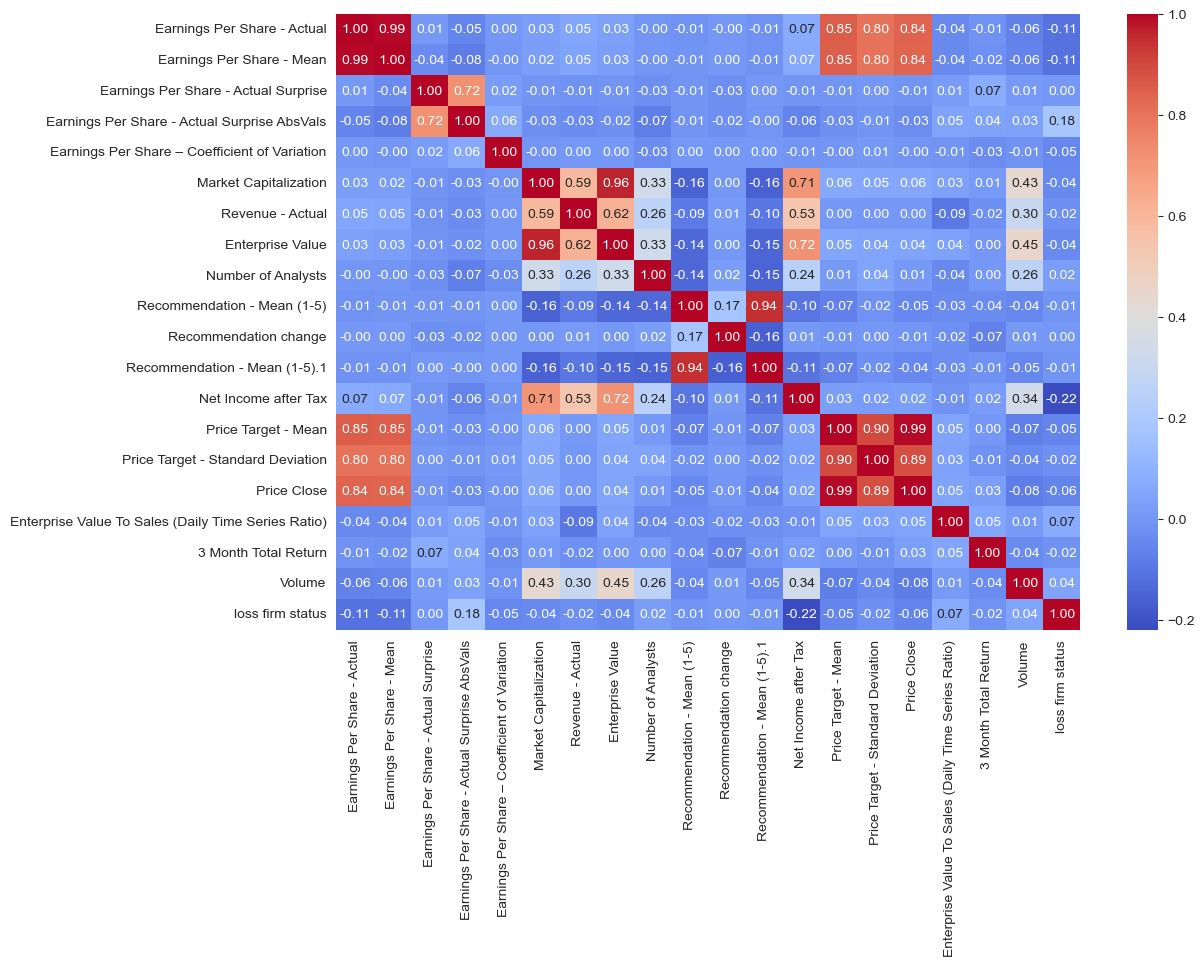

In [55]:
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

In [56]:
#for_rf = df_accuracy_new.iloc[:25,:]
for_rf = df[df['Instrument'] == 'AAPL.OQ']
#.iloc[0:38, :]

# print the reversed DataFrame
for_rf

,Instrument,Date,Earnings Per Share - Actual,Earnings Per Share - Mean,Earnings Per Share - Actual Surprise,Earnings Per Share - Actual Surprise AbsVals,GICS Industry Group Name,Earnings Per Share – Coefficient of Variation,Market Capitalization,Revenue - Actual,...,Recommendation change,Recommendation - Mean (1-5).1,Net Income after Tax,Price Target - Mean,Price Target - Standard Deviation,Price Close,Enterprise Value To Sales (Daily Time Series Ratio),3 Month Total Return,Volume,loss firm status
10137,AAPL.OQ,2013-01-01,0.49321,0.48109,2.520,2.520,Technology Hardware & Equipment,5.811802,4.793665e+11,5.451200e+10,...,0.07960,1.76786,1.307800e+10,25.38895,4.54189,19.036767,3.006664,-19.737215,121906437.0,-1
10138,AAPL.OQ,2013-04-01,0.36036,0.35721,0.881,0.881,Technology Hardware & Equipment,4.599535,4.156834e+11,4.360300e+10,...,0.03185,1.84746,9.547000e+09,20.91715,3.65908,15.808198,2.282290,-16.489690,0.0,-1
10139,AAPL.OQ,2013-07-01,0.26679,0.26143,2.049,2.049,Technology Hardware & Equipment,4.054623,3.722025e+11,3.532300e+10,...,0.05052,1.87931,6.900000e+09,19.24070,3.39846,14.145700,1.969590,-9.919175,0.0,-1
10140,AAPL.OQ,2013-10-01,0.29500,0.28414,3.822,3.822,Technology Hardware & Equipment,2.301682,4.385769e+11,3.747200e+10,...,0.03508,1.92983,7.512000e+09,19.92491,2.66156,17.026769,2.405362,21.163436,72711424.0,-1
10141,AAPL.OQ,2014-01-01,0.51786,0.50238,3.081,3.081,Technology Hardware & Equipment,2.257255,5.039343e+11,5.759400e+10,...,-0.00195,1.96491,1.307200e+10,21.29346,2.85787,20.039623,2.791847,18.383994,63846167.0,-1
10142,AAPL.OQ,2014-04-01,0.41500,0.36407,13.989,13.989,Technology Hardware & Equipment,1.996869,4.788732e+11,4.564600e+10,...,0.05490,1.96296,1.022300e+10,21.27050,2.73699,19.169267,2.521857,-3.773913,47069979.0,-1
10143,AAPL.OQ,2014-07-01,0.32000,0.30776,3.978,3.978,Technology Hardware & Equipment,3.499480,5.508839e+11,3.743200e+10,...,-0.11045,2.01786,7.748000e+09,25.28959,3.71550,23.232500,3.023181,21.847348,43372516.0,-1
10144,AAPL.OQ,2014-10-01,0.35500,0.32628,8.802,8.802,Technology Hardware & Equipment,3.763639,6.032776e+11,4.212300e+10,...,-0.02279,1.90741,8.467000e+09,28.13372,2.79397,25.187500,3.279654,8.954257,55882288.0,-1
10145,AAPL.OQ,2015-01-01,0.76500,0.65047,17.607,17.607,Technology Hardware & Equipment,4.466002,6.685331e+11,7.459900e+10,...,0.00000,1.88462,1.802400e+10,31.09884,3.57850,27.595000,3.597358,10.032024,46282028.0,-1
10146,AAPL.OQ,2015-04-01,0.58250,0.53968,7.935,7.935,Technology Hardware & Equipment,4.304403,7.179002e+11,5.801000e+10,...,0.05538,1.88462,1.356900e+10,35.86586,4.04363,31.107500,3.647214,13.170497,49290460.0,-1


In [57]:
corr_matrix = for_rf.groupby('Instrument').corr()

C:\Users\alexa\AppData\Local\Temp\ipykernel_8692\3194885904.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corr_matrix = for_rf.groupby('Instrument').corr()


<AxesSubplot: ylabel='Instrument-None'>

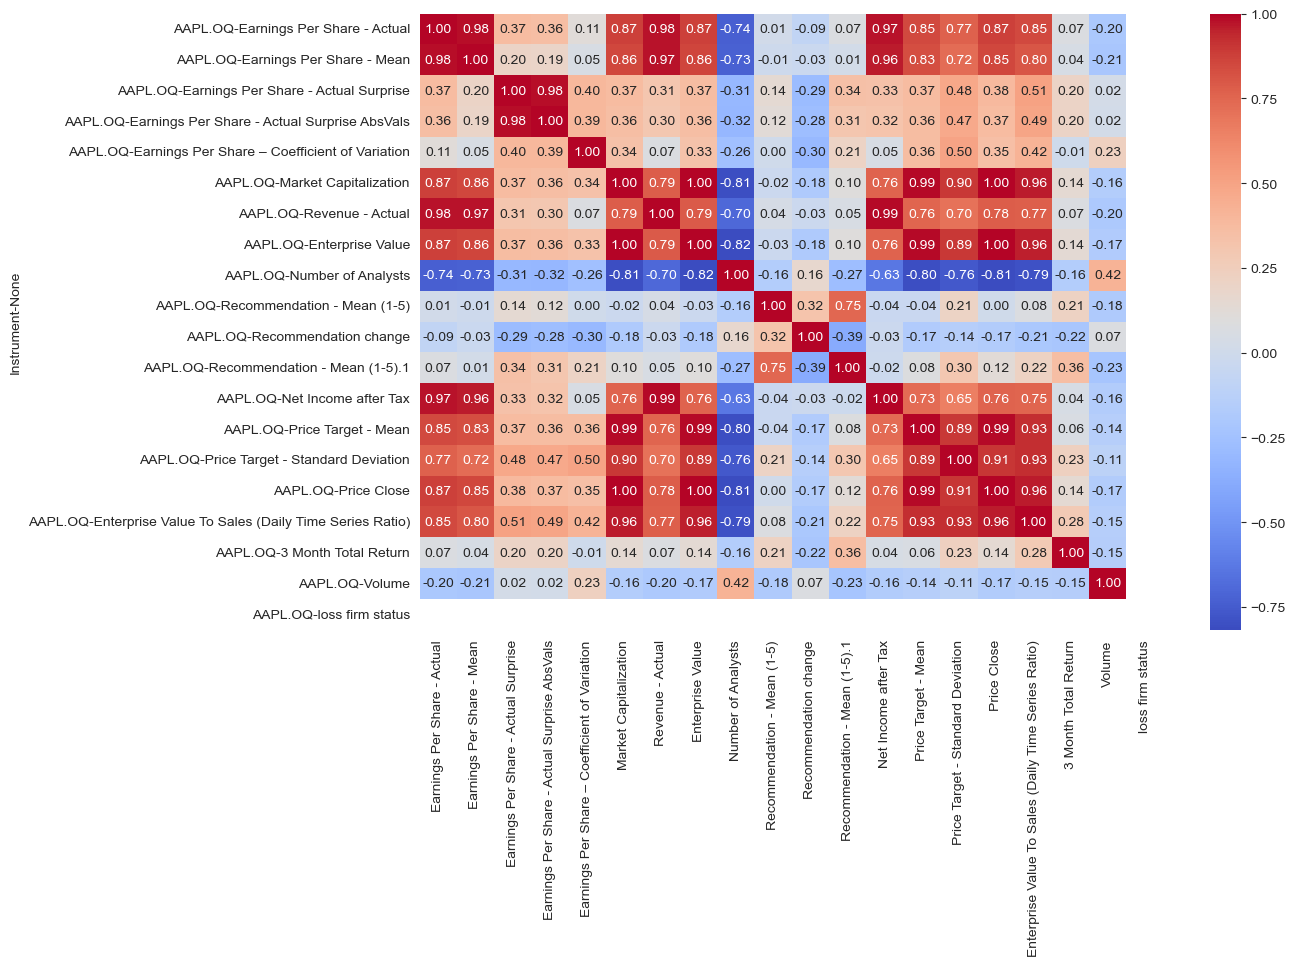

In [58]:
# plot a heatmap of the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

Some variables are highly correlated, so we will dorp them:

*

In [59]:
df = df.drop(["Enterprise Value", "Price Close", "Price Target - Mean", "Net Income after Tax", "Earnings Per Share - Actual", "Earnings Per Share - Mean"], axis=1)
for_rf = df[df['Instrument'] == 'AAPL.OQ']
#for_rf

In [60]:
corr_matrix = for_rf.groupby('Instrument').corr()

C:\Users\alexa\AppData\Local\Temp\ipykernel_8692\3194885904.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corr_matrix = for_rf.groupby('Instrument').corr()


<AxesSubplot: ylabel='Instrument-None'>

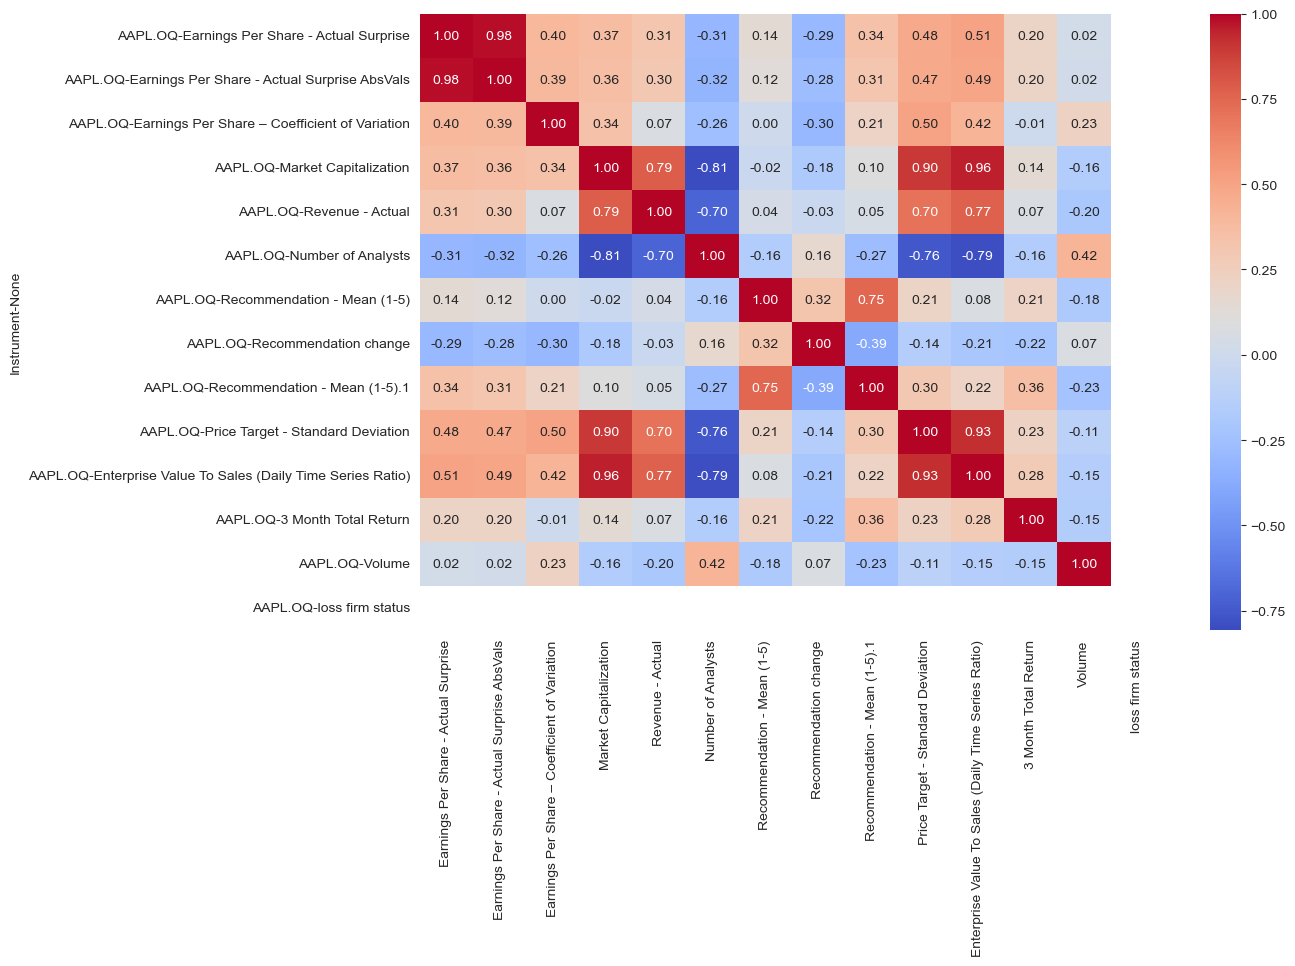

In [61]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

In [62]:
df.to_csv("Dataframes/economic_story_regression.csv", index=False)

# Checking Macro Variables

In [63]:
macro = pd.read_csv("Dataframes/macro_regression.csv")
macro["Date"] = pd.to_datetime(df["Date"]).dt.tz_localize(None)

In [64]:
for_rf = macro[macro['Instrument'] == 'AAPL.OQ']
#for_rf
corr_matrix = for_rf.groupby('Instrument').corr()

C:\Users\alexa\AppData\Local\Temp\ipykernel_8692\353657396.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corr_matrix = for_rf.groupby('Instrument').corr()


<AxesSubplot: ylabel='Instrument-None'>

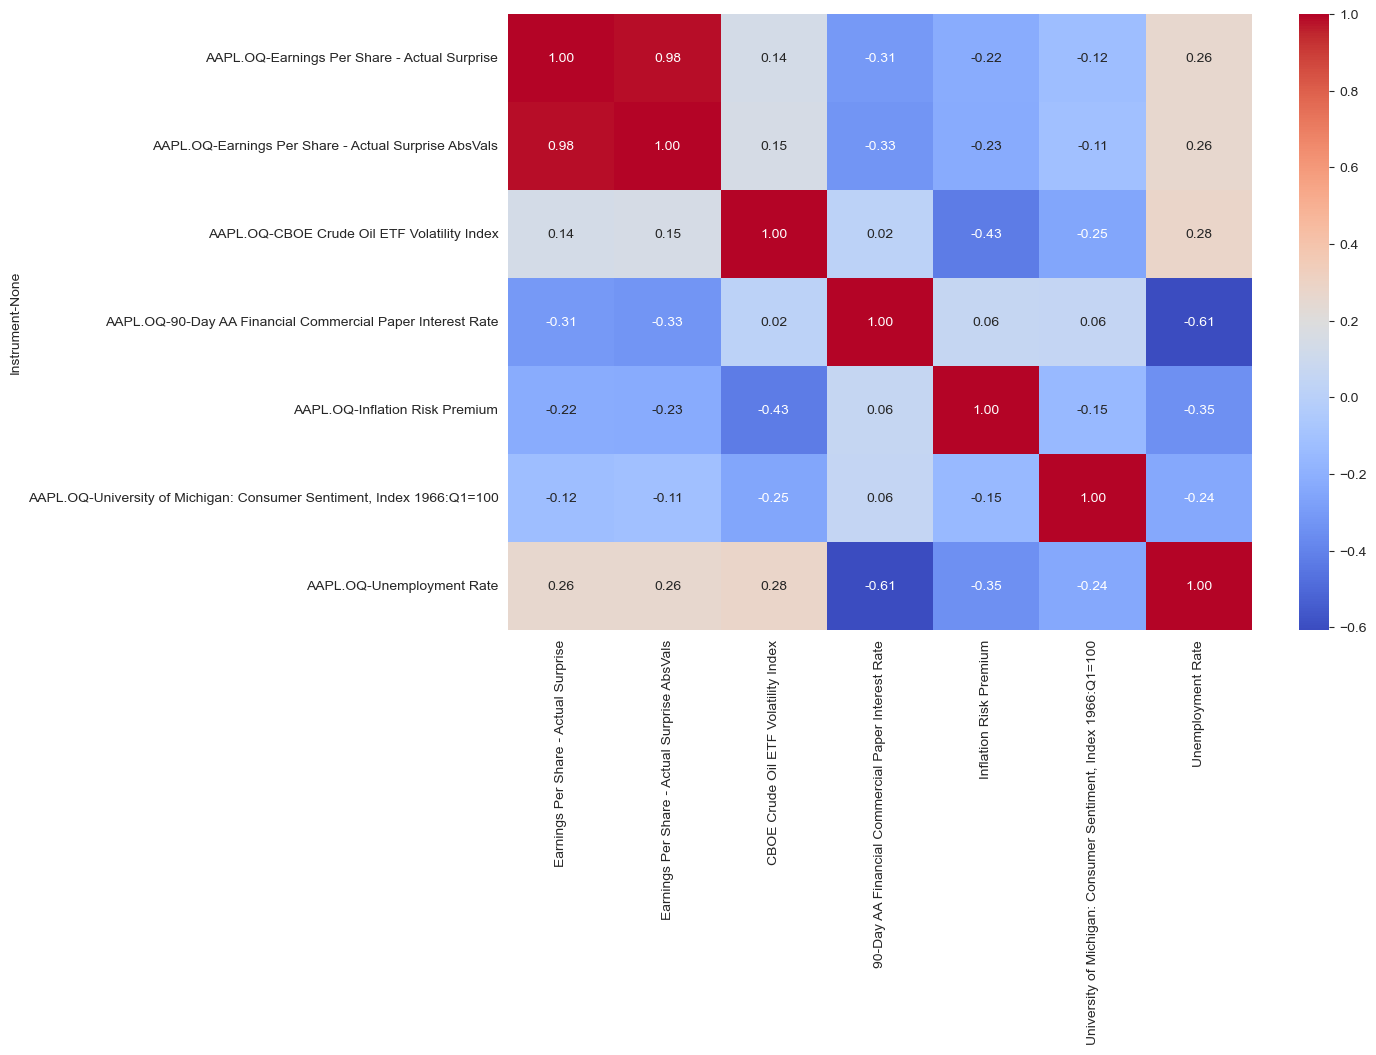

In [65]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')